we are apllying all things to all datasets

# Third datasets

here we import datasets work on it

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
df3=pd.read_csv("C:\\Users\\Shubham\\Desktop\\mini marathon challenge\\Dataset-3 - Dataset-3.csv")

Total Cost = Equipment Cost + Normalized Operating Cost + Investment Cos

draw networks graph

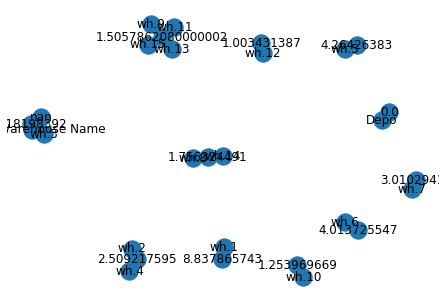

In [213]:
G3= nx.from_pandas_edgelist(df3 ,'Unnamed: 0' ,  'Demand','Travel Time between Depot and each Warehouses [days]')
nx.draw(G3, with_labels=True)

In [214]:
df3.describe()

,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size
count,16.000000,16.0,16.00000,16.00,16.0
mean,2.444985,0.0,1446.25000,38.75,320.0
std,2.016401,0.0,1939.71003,75.00,0.0
min,0.000000,0.0,445.00000,20.00,320.0
25%,1.505786,0.0,445.00000,20.00,320.0
50%,1.756324,0.0,445.00000,20.00,320.0
75%,2.634487,0.0,890.00000,20.00,320.0
max,8.837866,0.0,5340.00000,320.00,320.0


In [6]:
data11=df3.iloc[2:,4:5]
#x3=data11[]
x3=data11['Initial Possible Truck Size'].values


In [7]:
data12=df3.iloc[2:,3:4]
#data12
x4=data12['L'].values

In [8]:
data13=df3.iloc[2:, 5:6]
x5=data13['Possible Truck Size'].values

In [10]:
px=x5/x3

In [11]:
logpx=np.log(px)
px=x5/x3

In [12]:
investment_cast=x4*logpx

Equipment Cost = Truck Purchase Cost + Warehouse Purchase Cost
Truck Purchase Cost = (8350.6 * ln(C) - 14542.5) * Number of days used / 7300

In [14]:
c={'maximum load capicity':[20,40,60,80,100,120,140,180,200,220,240,260,280,300,320]}

In [18]:
maxload = pd.DataFrame(c) 
maxload1=maxload['maximum load capicity'].values
lnc=np.log(maxload1)
lnc
purchase=df3.iloc[2:, 7:8]
purchase=purchase['Travel Time between Depot and each Warehouses [days]'].values.astype(float)
purchase


array([1.0289, 1.3505, 1.5916, 1.5916, 1.5916, 1.7588, 1.9453, 1.7203,
       1.865 , 1.9293, 1.865 , 2.2186, 2.2026, 2.508 , 2.4598])

In [19]:
truck=(8350.6*lnc-14542.5)

In [20]:
truck_purchase_cast=truck*purchase/7300

In [21]:
truck_purchase_cast

array([ 1.47621243,  3.0084435 ,  4.28374424,  4.80751536,  5.21378381,
        6.12831659,  7.12117815,  6.79207561,  7.5881559 ,  8.06012017,
        7.97712194,  9.69270722,  9.80952774, 11.36759793, 11.33072881])


Warehouse Purchase Cost = 29.725 * T * Number of days used / 7300

In [22]:
T1=df3.iloc[2:,6:7]
T1 = T1.sort_values('Maximum Warehouse Size')
T2=T1['Maximum Warehouse Size'].values.astype(int)
T2

array([100, 160,  20,  20,  20,  20,  20,  20,  40,  40,  40,  40,  60,
        60,  60])

In [23]:
maxload1

array([ 20,  40,  60,  80, 100, 120, 140, 180, 200, 220, 240, 260, 280,
       300, 320], dtype=int64)

In [24]:
T=np.subtract(T2,maxload1)
T.astype(int)

array([  80,  120,  -40,  -60,  -80, -100, -120, -160, -160, -180, -200,
       -220, -220, -240, -260])

In [25]:
Tc=T2*29.725

In [26]:
Tc

array([2972.5, 4756. ,  594.5,  594.5,  594.5,  594.5,  594.5,  594.5,
       1189. , 1189. , 1189. , 1189. , 1783.5, 1783.5, 1783.5])

In [27]:
warehouse_cast=Tc*purchase/7300

In [28]:
warehouse_cast

array([0.41895962, 0.87986   , 0.12961729, 0.12961729, 0.12961729,
       0.14323378, 0.15842203, 0.1400984 , 0.30376507, 0.31423804,
       0.30376507, 0.36135827, 0.53812837, 0.61274219, 0.60096621])

Normalized Operating Cost = TruNormalized Operating Cost = Truck Operating Cost * Total Demand consumed in 7300 days / (Total Demand consumed in 7300 days + total stock of products at the end - total stock of products at the beginning)
Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * truck operation days + number of truck stops at depot or warehouse * 2ck Operating Cost * Total Demand consumed in 7300 days / (Total Demand consumed in 7300 days + total stock of products at the end - total stock of products at the beginning)

In [30]:
#data4=pd.DataFrame(x)
x={'trucks operation day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
data4=pd.DataFrame(x)
day=data4['trucks operation day'].values
day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [31]:
truck_stop={'trucks operation day':[1,2,3,4,5,5,4,3,2,1,5,4,3,2,1]}
stop=pd.DataFrame(truck_stop)
stop=stop['trucks operation day'].values
stop


array([1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1], dtype=int64)

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * <truck operation days>  + <number of truck stops at depot or warehouse> * 2

C: Maximum load capacity of a truck (20 ~ 320, 20 increments)

“truck operation days” is the actual days took that truck was moving. Loading/Unloading and parking time are not included.

note that trucks can spend more than the days between warehouses mentioned in the datasets. Meaning trucks can be parked at the warehouses or depots.

If there are warehouse#1 and warehouse#2 that needs 3 days of travel time, the truck could park at #1 for 2 days or travel slowly to make travel time as 5 days. In both cases, the “total operation days” should be calculated as 3 days.

In [32]:
operating_cast=1.67012*lnc-2.9885

In [33]:
truck_operating_cast=operating_cast*(day+stop*2)

In [34]:
demand=df3.iloc[2:,1:2]

In [35]:
demand=demand['Demand'].values

In [36]:
demand

array([8.83786574, 2.50921759, 2.18198392, 2.50921759, 4.26426383,
       4.01372555, 3.01029416, 1.75632449, 1.50578621, 1.25396967,
       1.50578621, 1.00343139, 1.50578621, 1.75632449, 1.50578621])

In [38]:
beg=df3.iloc[2:,4:5]
beg
beg1=beg['Initial Possible Truck Size'].values

In [42]:
end=df3.iloc[2:,5:6]
end=end['Possible Truck Size'].values
end
new=end-beg1

In [43]:
demand1=demand+new
demand2=demand/demand1

In [44]:
normalised_cast=truck_operating_cast*demand2
normalised_cast

array([0.1729639 , 0.15788286, 0.25016992, 0.43099268, 0.98862238,
       1.05771378, 0.78453288, 0.46318882, 0.38048083, 0.30067429,
       0.6465583 , 0.41993662, 0.6094108 , 0.68490867, 0.56419653])

In [45]:
totalcast=normalised_cast+warehouse_cast+truck_purchase_cast+investment_cast

In [46]:
totalcast

array([ 1235.87011736,  1237.84816776, 14810.28730821, 14810.99190209,
       14811.95580024,  1241.13124555,  1241.86611446,  1241.19734423,
        1242.07438319,  1242.4770139 ,  1242.7294267 ,  1244.27598351,
        2478.56102971,  2480.26921158,  2480.09985434])

In [205]:
w=df3.iloc[2:, 0:1]
w1=w['Unnamed: 0'].values
w1

array(['wh.1', 'wh.2', 'wh.3', 'wh.4', 'wh.5', 'wh.6', 'wh.7', 'wh.8',
       'wh.9', 'wh.10', 'wh.11', 'wh.12', 'wh.13', 'wh.14', 'wh.15'],
      dtype=object)

In [227]:
w2=df3.iloc[2:17, 2:3]
w2=w2['Demand Growth Rate'].values
w2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [232]:
w3=df3['Unnamed: 0'].values
w4=df3['Demand'].values
w5=df3['Maximum Warehouse Size'].values
import pandas 
df=pandas.DataFrame(data={"Ware":w3,"Demand":w4,"Maximum Warehouse Size":w5})
df.to_csv("./dataset3_warehouse_input.csv", sep=',',index=False)

In [240]:
import pandas
df = pandas.DataFrame(data={"Warehouse":w1,"Deamad Growth Rate":w2,"L":x4,"possible truck size":x5,"intial possible truck size":x3,"maximum loading capicity":
                            maxload1,"number of days  used":purchase,"maximum warehouse size":T2,"truck operation day":
                            day,"truck stopage":stop,"Demand":demand,
                            "total stock of products at the end":end,
                            "total stock of products at the begining":beg1,
                            "Normalised Operating Cost": normalised_cast, "Equipment cost":equipment_cost,"truck operating cast": truck_operating_cast,"truck  purchase cast":truck_purchase_cast,"Investment Cost" : investment_cast,
                            "total cast(Equipment cost + Normalized Operating Cost + Investment Cost)":totalcast})
df.to_csv("./dataset3_solution.csv", sep=',',index=False)

# conclusion

at last we computed all condition for above datasets and corresponding which we have find total cast and warehouse wh1, wh2,...., and also find truck purchase cast, investment cast , equipment cast, normalized cast, and also find minimum time interval between two stop of truck and also find time interval and demand of the truck with corresponding demand growth rate 

for applaying for the fourth data sets

# Four Datasets

In [48]:
df4=pd.read_csv("C:\\Users\\Shubham\\Desktop\\mini marathon challenge\\Dataset-4 - Dataset-4.csv")

In [216]:
df4.describe()

,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size
count,16.000000,16.0,16.000000,16.00,16.0
mean,3.728625,0.0,1974.687500,38.75,320.0
std,1.416280,0.0,2332.008054,75.00,0.0
min,0.000000,0.0,890.000000,20.00,320.0
25%,3.102000,0.0,890.000000,20.00,320.0
50%,4.344500,0.0,890.000000,20.00,320.0
75%,4.526500,0.0,890.000000,20.00,320.0
max,5.425000,0.0,6675.000000,320.00,320.0


draw networkx graph

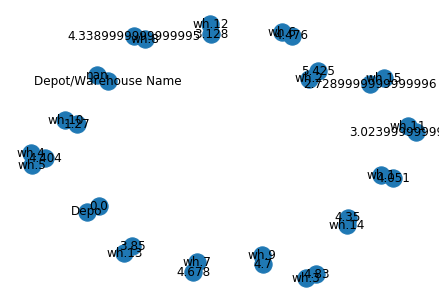

In [217]:
G4= nx.from_pandas_edgelist(df4 ,'Unnamed: 0' ,  'Demand','Travel Time between Depot and each Warehouses [days]')
nx.draw(G4, with_labels=True)

In [56]:
data11=df4.iloc[2:,4:5]
#x3=data11[]
x3=data11['Initial Possible Truck Size'].values
data12=df4.iloc[2:,3:4]
#data12
x4=data12['L'].values
data13=df4.iloc[2:, 5:6]
x5=data13['Possible Truck Size'].values
px=x5/x3
logpx=np.log(px)
investment_cast=x4*logpx

In [57]:
investment_cast

array([ 2467.60396279,  2467.60396279,  2467.60396279,  2467.60396279,
        2467.60396279,  2467.60396279, 18507.02972095, 18507.02972095,
       18507.02972095,  2467.60396279,  2467.60396279,  2467.60396279,
        2467.60396279,  2467.60396279,  2467.60396279])

Equipment Cost = Truck Purchase Cost + Warehouse Purchase Cost

Truck Purchase Cost = (8350.6 * ln(C) - 14542.5) * Number of days used / 7300

In [58]:
c={'maximum load capicity':[20,40,60,80,100,120,140,180,200,220,240,260,280,300,320]}
maxload = pd.DataFrame(c) 
maxload1=maxload['maximum load capicity'].values
lnc=np.log(maxload1)
lnc
purchase=df4.iloc[2:, 7:8]
purchase=purchase['Travel Time between Depot and each Warehouses [days]'].values.astype(float)
purchase
truck=(8350.6*lnc-14542.5)
truck_purchase_cast=truck*purchase/7300

In [59]:
truck_purchase_cast

array([2.00678232, 4.01110949, 3.2020423 , 2.81666755, 2.63342599,
       1.45646824, 3.94331625, 4.1258612 , 4.64443966, 4.2984801 ,
       5.50143391, 5.12726999, 3.50855623, 2.18604166, 4.8136481 ])

Warehouse Purchase Cost = 29.725 * T * Number of days used / 7300

In [60]:
T1=df4.iloc[2:, 6:7]
T1 = T1.sort_values('Maximum Warehouse Size')
T2=T1['Maximum Warehouse Size'].values.astype(int)
T2
maxload1
T=np.subtract(T2,maxload1)
T.astype(int)

array([300, 280, 260, 240, 220, 200, 180, 140, 120, 100,  80,  60,  40,
        20,   0])

In [62]:
Tc=T2*29.725
Tc
warehouse_cast=Tc*purchase/7300
warehouse_cast

array([1.82252526, 2.34620647, 1.5501954 , 1.21506027, 1.04749271,
       0.54465973, 1.40360636, 1.36164932, 1.48739014, 1.34067079,
       1.67593622, 1.52921688, 1.02651419, 0.62844351, 1.36164932])

Normalized Operating Cost = Truck Operating Cost * Total Demand consumed in 7300 days / (Total Demand consumed in 7300 days + total stock of products at the end - total stock of products at the beginning)

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * truck operation days + number of truck stops at depot or warehouse * 2

In [63]:
data4=pd.DataFrame(x)
x={'trucks operation day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
day=data4['trucks operation day'].values
day
truck_stop={'trucks operation day':[1,2,3,4,5,5,4,3,2,1,5,4,3,2,1]}
stop=pd.DataFrame(truck_stop)
stop=stop['trucks operation day'].values
stop

array([1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1], dtype=int64)

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * <truck operation days>  + <number of truck stops at depot or warehouse> * 2

C: Maximum load capacity of a truck (20 ~ 320, 20 increments)

“truck operation days” is the actual days took that truck was moving. Loading/Unloading and parking time are not included.

note that trucks can spend more than the days between warehouses mentioned in the datasets. Meaning trucks can be parked at the warehouses or depots.

If there are warehouse#1 and warehouse#2 that needs 3 days of travel time, the truck could park at #1 for 2 days or travel slowly to make travel time as 5 days. In both cases, the “total operation days” should be calculated as 3 days.

In [66]:
operating_cast=1.67012*lnc-2.9885
truck_operating_cast=operating_cast*(day+stop*2)
truck_operating_cast

array([  6.04419715,  19.03422812,  34.64592066,  51.96012388,
        70.54030247,  80.11497135,  78.96953764,  79.58105534,
        76.1842354 ,  72.23406285, 129.46131825, 125.97011211,
       122.02322143, 117.67502136, 112.96990045])

In [67]:
demand=df4.iloc[2:,1:2]
demand
demand=demand['Demand'].values
demand
beg=df4.iloc[2:,4:5]
beg
beg1=beg['Initial Possible Truck Size'].values
beg1
end=df4.iloc[2:,5:6]
end=end['Possible Truck Size'].values
new=end-beg1
demand1=demand+new
demand2=demand/demand1

In [68]:
normalised_cast=truck_operating_cast*demand2
normalised_cast

array([0.08052939, 0.33808852, 0.54896105, 0.75173909, 1.02054997,
       1.17774344, 1.21249154, 1.13459727, 1.17514246, 0.30450181,
       1.29194726, 1.2998948 , 1.54612277, 1.68190026, 1.01838561])

In [69]:
totalcast=normalised_cast+warehouse_cast+truck_purchase_cast+investment_cast

In [70]:
totalcast

array([ 2471.51379977,  2474.29936728,  2472.90516154,  2472.38742971,
        2472.30543146,  2470.7828342 , 18513.5891351 , 18513.65182873,
       18514.3366932 ,  2473.54761549,  2476.07328018,  2475.56034445,
        2473.68515598,  2472.10034822,  2474.79764583])

In [201]:
w=df4.iloc[2:, 0:1]
w1=w['Unnamed: 0'].values 
w1

array(['wh.1', 'wh.2', 'wh.3', 'wh.4', 'wh.5', 'wh.6', 'wh.7', 'wh.8',
       'wh.9', 'wh.10', 'wh.11', 'wh.12', 'wh.13', 'wh.14', 'wh.15'],
      dtype=object)

In [228]:
w2=df4.iloc[2:17, 2:3]
w2=w2['Demand Growth Rate'].values
w2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [233]:
w3=df4['Unnamed: 0'].values
w4=df4['Demand'].values
w5=df4['Maximum Warehouse Size'].values
import pandas 
df=pandas.DataFrame(data={"Ware":w3,"Demand":w4,"Maximum Warehouse Size":w5})
df.to_csv("./dataset4_warehouse_input.csv", sep=',',index=False)

In [239]:
import pandas
df = pandas.DataFrame(data={"Warehouse":w1,"Demand Growth Rate ":w2,"L":x4,"possible truck size":x5,"intial possible truck size":x3,"maximum loading capicity":
                            maxload1,"number of days  used":purchase,"maximum warehouse size":T2,"truck operation day":
                            day,"truck stopage":stop,"Demand":demand,
                            "total stock of products at the end":end,
                            "total stock of products at the begining":beg1,
                            "Normalised Operating Cost": normalised_cast, "Equipment cast":equipment_cost,"truck operating cast": truck_operating_cast,"truck  purchase cast":truck_purchase_cast,"Investment Cost" : investment_cast,
                            "total cast(Equipment cost + Normalized Operating Cost + Investment Cost)":totalcast})
df.to_csv("./dataset4_solution.csv", sep=',',index=False)

# conclusion

at last we computed all condition for above datasets and corresponding which we have find total cast and warehouse wh1, wh2,...., and also find truck purchase cast, investment cast , equipment cast, normalized cast, and also find minimum time interval between two stop of truck and also find time interval and demand of the truck with corresponding demand growth rate 

# fifth datasets

In [72]:
df5=pd.read_csv("C:\\Users\\Shubham\\Desktop\\mini marathon challenge\\Dataset-5 - Dataset-5.csv ")

In [77]:
df5.head()

,Unnamed: 0,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size,Maximum Warehouse Size,Travel Time between Depot and each Warehouses [days],Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Depot/Warehouse Name,NaN,NaN,NaN,NaN,NaN,NaN,Depo,wh.1,wh.2,...,wh.6,wh.7,wh.8,wh.9,wh.10,wh.11,wh.12,wh.13,wh.14,wh.15
1,Depo,0.000,0.0,2225.0,320.0,320.0,-,0,1.0289,1.3505,...,1.7588,1.9453,1.7203,1.865,1.9293,1.865,2.2186,2.2026,2.508,2.4598
2,wh.1,1.065,0.0,2225.0,20.0,320.0,320,1.0289,0,0.3215,...,0.7299,0.9164,0.6913,0.836,0.9003,0.836,1.1897,1.1736,1.4791,1.4309
3,wh.2,1.963,0.0,2225.0,20.0,320.0,320,1.3505,0.3215,0,...,0.5305,0.836,0.3537,0.5145,0.5788,0.5145,1.2379,0.8682,1.1897,1.3023
4,wh.3,0.808,0.0,2225.0,20.0,320.0,320,1.5916,0.8521,0.9325,...,0.6913,0.8842,1.254,1.3344,1.4469,1.4791,1.2701,1.6399,1.4791,1.4309


In [218]:
df5.describe()

,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size
count,16.000000,16.0,16.0,16.00,16.0
mean,2.241000,0.0,2225.0,38.75,320.0
std,1.375454,0.0,0.0,75.00,0.0
min,0.000000,0.0,2225.0,20.00,320.0
25%,1.149750,0.0,2225.0,20.00,320.0
50%,1.963000,0.0,2225.0,20.00,320.0
75%,3.217500,0.0,2225.0,20.00,320.0
max,4.374000,0.0,2225.0,320.00,320.0


draw networkx graph

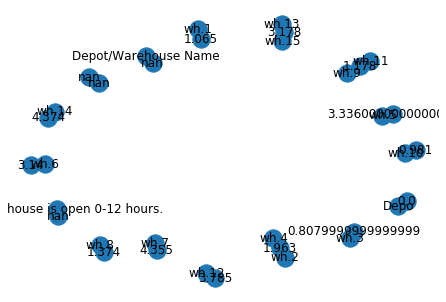

In [219]:
G5= nx.from_pandas_edgelist(df5 ,'Unnamed: 0' ,  'Demand','Travel Time between Depot and each Warehouses [days]')
nx.draw(G5, with_labels=True)

In [79]:
data11=df5.iloc[2:,4:5]
#x3=data11[]
x3=data11['Initial Possible Truck Size'].values
data12=df5.iloc[2:,3:4]
#data12
x4=data12['L'].values
data13=df5.iloc[2:, 5:6]
x5=data13['Possible Truck Size'].values
px=x5/x3
logpx=np.log(px)
investment_cast=x4*logpx

In [75]:
investment_cast

array([6169.00990698, 6169.00990698, 6169.00990698, 6169.00990698,
       6169.00990698, 6169.00990698, 6169.00990698, 6169.00990698,
       6169.00990698, 6169.00990698, 6169.00990698, 6169.00990698,
       6169.00990698, 6169.00990698, 6169.00990698,           nan,
                 nan])

In [96]:
data11=df5.iloc[2:17,4:5]
data11
x3=data11['Initial Possible Truck Size'].values
x3

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [97]:
data12=df5.iloc[2:17,3:4]
data12
x4=data12['L'].values
x4

array([2225., 2225., 2225., 2225., 2225., 2225., 2225., 2225., 2225.,
       2225., 2225., 2225., 2225., 2225., 2225.])

In [99]:
data13=df5.iloc[2:17, 5:6]
x5=data13['Possible Truck Size'].values
px=x5/x3
logpx=np.log(px)
investment_cast=x4*logpx
investment_cast

array([6169.00990698, 6169.00990698, 6169.00990698, 6169.00990698,
       6169.00990698, 6169.00990698, 6169.00990698, 6169.00990698,
       6169.00990698, 6169.00990698, 6169.00990698, 6169.00990698,
       6169.00990698, 6169.00990698, 6169.00990698])

Equipment Cost = Truck Purchase Cost + Warehouse Purchase Cost

Truck Purchase Cost = (8350.6 * ln(C) - 14542.5) * Number of days used / 7300

In [102]:
c={'maximum load capicity':[20,40,60,80,100,120,140,180,200,220,240,260,280,300,320]}
maxload = pd.DataFrame(c) 
maxload1=maxload['maximum load capicity'].values
lnc=np.log(maxload1)
lnc

array([2.99573227, 3.68887945, 4.09434456, 4.38202663, 4.60517019,
       4.78749174, 4.94164242, 5.19295685, 5.29831737, 5.39362755,
       5.48063892, 5.56068163, 5.6347896 , 5.70378247, 5.768321  ])

In [106]:
purchase=df5.iloc[2:17, 7:8]
purchase=purchase['Travel Time between Depot and each Warehouses [days]'].values.astype(float)
purchase


array([1.0289, 1.3505, 1.5916, 1.5916, 1.5916, 1.7588, 1.9453, 1.7203,
       1.865 , 1.9293, 1.865 , 2.2186, 2.2026, 2.508 , 2.4598])

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * <truck operation days>  + <number of truck stops at depot or warehouse> * 2

C: Maximum load capacity of a truck (20 ~ 320, 20 increments)

“truck operation days” is the actual days took that truck was moving. Loading/Unloading and parking time are not included.

note that trucks can spend more than the days between warehouses mentioned in the datasets. Meaning trucks can be parked at the warehouses or depots.

If there are warehouse#1 and warehouse#2 that needs 3 days of travel time, the truck could park at #1 for 2 days or travel slowly to make travel time as 5 days. In both cases, the “total operation days” should be calculated as 3 days.

In [108]:
truck=(8350.6*lnc-14542.5)
truck_purchase_cast=truck*purchase/7300
truck_purchase_cast

array([ 1.47621243,  3.0084435 ,  4.28374424,  4.80751536,  5.21378381,
        6.12831659,  7.12117815,  6.79207561,  7.5881559 ,  8.06012017,
        7.97712194,  9.69270722,  9.80952774, 11.36759793, 11.33072881])

Warehouse Purchase Cost = 29.725 * T * Number of days used / 7300

In [116]:
T2=df5['Maximum Warehouse Size']
T1=df5.iloc[2:17, 6:7]
#T1 = T1.sort_values('Maximum Warehouse Size')
T2=T1['Maximum Warehouse Size'].values.astype(int)
T2

array([320, 320, 320, 320, 320, 320,  20, 320, 320, 320, 320,  20,  20,
        20,  20])

In [117]:
maxload1

array([ 20,  40,  60,  80, 100, 120, 140, 180, 200, 220, 240, 260, 280,
       300, 320], dtype=int64)

In [118]:
T=np.subtract(T2,maxload1)
T.astype(int)

array([ 300,  280,  260,  240,  220,  200, -120,  140,  120,  100,   80,
       -240, -260, -280, -300])

In [119]:
Tc=T2*29.725

In [120]:
Tc

array([9512. , 9512. , 9512. , 9512. , 9512. , 9512. ,  594.5, 9512. ,
       9512. , 9512. , 9512. ,  594.5,  594.5,  594.5,  594.5])

In [122]:
warehouse_cast=Tc*purchase/7300
warehouse_cast

array([1.34067079, 1.75972   , 2.0738766 , 2.0738766 , 2.0738766 ,
       2.29174049, 0.15842203, 2.24157447, 2.43012055, 2.51390433,
       2.43012055, 0.18067914, 0.17937612, 0.2042474 , 0.20032207])

Normalized Operating Cost = Truck Operating Cost * Total Demand consumed in 7300 days / (Total Demand consumed in 7300 days + total stock of products at the end - total stock of products at the beginning)

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * truck operation days + number of truck stops at depot or warehouse * 2

In [124]:
data4=pd.DataFrame(x)
x={'trucks operation day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
day=data4['trucks operation day'].values
day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [125]:
truck_stop={'trucks operation day':[1,2,3,4,5,5,4,3,2,1,5,4,3,2,1]}
stop=pd.DataFrame(truck_stop)
stop=stop['trucks operation day'].values
stop

array([1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1], dtype=int64)

In [126]:
operating_cast=1.67012*lnc-2.9885

In [127]:
truck_operating_cast=operating_cast*(day+stop*2)

In [133]:
demand=df5.iloc[2:17,1:2]
demand
demand=demand['Demand'].values
demand

array([1.065, 1.963, 0.808, 1.963, 3.336, 3.14 , 4.355, 1.374, 1.178,
       0.981, 1.178, 3.785, 3.178, 4.374, 3.178])

In [137]:
beg=df5.iloc[2:17,4:5]
beg
beg1=beg['Initial Possible Truck Size'].values
beg1

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [139]:
end=df5.iloc[2:17,5:6]
end=end['Possible Truck Size'].values
new=end-beg1


In [140]:
demand1=demand+new
demand2=demand/demand1

In [141]:
normalised_cast=truck_operating_cast*demand2
normalised_cast

array([0.021381  , 0.12373764, 0.09306237, 0.33778219, 0.77578147,
       0.82985093, 1.12997104, 0.36281952, 0.29798003, 0.23543551,
       0.50636312, 1.56952079, 1.27908291, 1.69104636, 1.18418336])

In [208]:
equipment_cost=warehouse_cast+truck_purchase_cast
equipment_cost

array([ 2.7330913 ,  4.5481985 ,  5.96876898,  6.36292282,  6.63957397,
        7.5606544 ,  8.54697646,  7.77276444,  8.49945111,  8.84571528,
        8.58465207, 10.23474463, 10.16827999, 11.57184533, 11.33072881])

In [142]:
totalcast=normalised_cast+warehouse_cast+truck_purchase_cast+investment_cast

In [143]:
totalcast

array([6171.84817121, 6173.90180813, 6175.46059019, 6176.22908114,
       6177.07334887, 6178.259815  , 6177.41947821, 6178.40637658,
       6179.32616346, 6179.819367  , 6179.92351259, 6180.45281413,
       6180.27789375, 6182.27279867, 6181.72514123])

In [203]:
w=df5.iloc[2:17, 0:1]
w1=w['Unnamed: 0'].values
w1

array(['wh.1', 'wh.2', 'wh.3', 'wh.4', 'wh.5', 'wh.6', 'wh.7', 'wh.8',
       'wh.9', 'wh.10', 'wh.11', 'wh.12', 'wh.13', 'wh.14', 'wh.15'],
      dtype=object)

In [ ]:
w2=df5.iloc[2:17, 2:3]
w2=w2['Demand Growth Rate'].values
w2

In [234]:
w3=df5['Unnamed: 0'].values
w4=df5['Demand'].values
w5=df5['Maximum Warehouse Size'].values
import pandas 
df=pandas.DataFrame(data={"Ware":w3,"Demand":w4,"Maximum Warehouse Size":w5})
df.to_csv("./dataset5_warehouse_input.csv", sep=',',index=False)

In [238]:
import pandas
df = pandas.DataFrame(data={"Warehouse":w1,"Demand Growth Rate":w2,"L":x4,"possible truck size":x5,"intial possible truck size":x3,"maximum loading capicity":
                            maxload1,"number of days  used":purchase,"maximum warehouse size":T2,"truck operation day":
                            day,"truck stopage":stop,"Demand":demand,
                            "total stock of products at the end":end,
                            "total stock of products at the begining":beg1,
                            "Normalised Opearting Cost": normalised_cast,"Equipment cast":equipment_cost, "truck operating cast": truck_operating_cast,"truck  purchase cast":truck_purchase_cast,"Investment Cost" : investment_cast,
                            "total cast(Equipment cost + Normalized Operating Cost + Investment Cost)":totalcast})
df.to_csv("./dataset5_solution.csv", sep=',',index=False)

# conclusion

at last we computed all condition for above datasets and corresponding which we have find total cast and warehouse wh1, wh2,...., and also find truck purchase cast, investment cast , equipment cast, normalized cast, and also find minimum time interval between two stop of truck and also find time interval and demand of the truck with corresponding demand growth rate 

# Sixth datasets

In [145]:
df6=pd.read_csv("C:\\Users\\Shubham\\Desktop\\mini marathon challenge\\Dataset-6 - Dataset-6.csv")

In [146]:
df6.head(5)

,Unnamed: 0,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size,Maximum Warehouse Size,Travel Time between Depot and each Warehouses [days],Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Depot/Warehouse Name,NaN,NaN,NaN,NaN,NaN,NaN,Depo,wh.1,wh.2,...,wh.6,wh.7,wh.8,wh.9,wh.10,wh.11,wh.12,wh.13,wh.14,wh.15
1,Depo,0.000,0.0,1246.0,320.0,320.0,-,0,1.0289,1.3505,...,1.7588,1.9453,1.7203,1.865,1.9293,1.865,2.2186,2.2026,2.508,2.4598
2,wh.1,6.914,0.0,1246.0,20.0,320.0,320,1.0289,0,0.3215,...,0.7299,0.9164,0.6913,0.836,0.9003,0.836,1.1897,1.1736,1.4791,1.4309
3,wh.2,1.963,0.0,1246.0,20.0,320.0,320,1.3505,0.3215,0,...,0.5305,0.836,0.3537,0.5145,0.5788,0.5145,1.2379,0.8682,1.1897,1.3023
4,wh.3,4.707,0.0,1246.0,20.0,320.0,320,1.5916,0.8521,0.9325,...,0.6913,0.8842,1.254,1.3344,1.4469,1.4791,1.2701,1.6399,1.4791,1.4309


In [220]:
df6.describe()

,Demand,Demand Growth Rate,L,Initial Possible Truck Size,Possible Truck Size
count,16.000000,16.0,16.000000,16.00,16.0
mean,1.578562,0.0,1407.312500,38.75,320.0
std,1.786726,0.0,198.262358,75.00,0.0
min,0.000000,0.0,1246.000000,20.00,320.0
25%,0.496500,0.0,1246.000000,20.00,320.0
50%,1.177000,0.0,1246.000000,20.00,320.0
75%,1.521250,0.0,1557.500000,20.00,320.0
max,6.914000,0.0,1691.000000,320.00,320.0


draw networkx graph

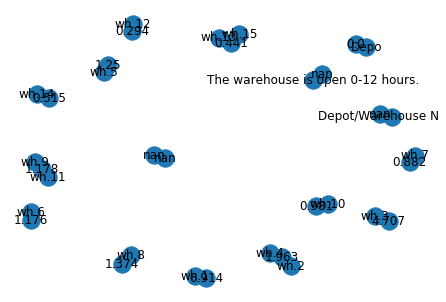

In [222]:
G6= nx.from_pandas_edgelist(df6 ,'Unnamed: 0' ,  'Demand','Travel Time between Depot and each Warehouses [days]')
nx.draw(G6, with_labels=True)

In [150]:
data11=df6.iloc[2:17,4:5]
#x3=data11[]
x3=data11['Initial Possible Truck Size'].values
x3

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [152]:
data12=df6.iloc[2:17,3:4]
#data12
x4=data12['L'].values
x4

array([1246., 1246., 1246., 1246., 1513., 1513., 1513., 1246., 1246.,
       1246., 1246., 1691., 1691., 1691., 1691.])

In [153]:
data13=df6.iloc[2:17, 5:6]
x5=data13['Possible Truck Size'].values
x5

array([320., 320., 320., 320., 320., 320., 320., 320., 320., 320., 320.,
       320., 320., 320., 320.])

In [154]:
px=x5/x3
logpx=np.log(px)
investment_cast=x4*logpx

In [155]:
investment_cast

array([3454.64554791, 3454.64554791, 3454.64554791, 3454.64554791,
       4194.92673675, 4194.92673675, 4194.92673675, 3454.64554791,
       3454.64554791, 3454.64554791, 3454.64554791, 4688.44752931,
       4688.44752931, 4688.44752931, 4688.44752931])

Equipment Cost = Truck Purchase Cost + Warehouse Purchase Cost

Truck Purchase Cost = (8350.6 * ln(C) - 14542.5) * Number of days used / 7300

In [158]:
c={'maximum load capicity':[20,40,60,80,100,120,140,180,200,220,240,260,280,300,320]}
maxload = pd.DataFrame(c) 
maxload1=maxload['maximum load capicity'].values
lnc=np.log(maxload1)
lnc

array([2.99573227, 3.68887945, 4.09434456, 4.38202663, 4.60517019,
       4.78749174, 4.94164242, 5.19295685, 5.29831737, 5.39362755,
       5.48063892, 5.56068163, 5.6347896 , 5.70378247, 5.768321  ])

In [159]:
purchase=df6.iloc[2:17, 7:8]
purchase=purchase['Travel Time between Depot and each Warehouses [days]'].values.astype(float)
purchase

array([1.0289, 1.3505, 1.5916, 1.5916, 1.5916, 1.7588, 1.9453, 1.7203,
       1.865 , 1.9293, 1.865 , 2.2186, 2.2026, 2.508 , 2.4598])

In [160]:
truck=(8350.6*lnc-14542.5)

In [162]:
truck_purchase_cast=truck*purchase/7300
truck_purchase_cast

array([ 1.47621243,  3.0084435 ,  4.28374424,  4.80751536,  5.21378381,
        6.12831659,  7.12117815,  6.79207561,  7.5881559 ,  8.06012017,
        7.97712194,  9.69270722,  9.80952774, 11.36759793, 11.33072881])

 Warehouse Purchase Cost = 29.725 * T * Number of days used / 7300

In [166]:
T1=df6.iloc[2:17, 6:7]
#T1 = T1.sort_values('Maximum Warehouse Size')
T2=T1['Maximum Warehouse Size'].values.astype(int)
T2

array([320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320,
       320, 320])

In [167]:
maxload1

array([ 20,  40,  60,  80, 100, 120, 140, 180, 200, 220, 240, 260, 280,
       300, 320], dtype=int64)

In [168]:
T=np.subtract(T2,maxload1)
T.astype(int)

array([300, 280, 260, 240, 220, 200, 180, 140, 120, 100,  80,  60,  40,
        20,   0])

In [169]:
Tc=T*29.725

In [170]:
Tc

array([8917.5, 8323. , 7728.5, 7134. , 6539.5, 5945. , 5350.5, 4161.5,
       3567. , 2972.5, 2378. , 1783.5, 1189. ,  594.5,    0. ])

In [172]:
warehouse_cast=Tc*purchase/7300
warehouse_cast

array([1.25687887, 1.539755  , 1.68502474, 1.55540745, 1.42579016,
       1.43233781, 1.42579831, 0.98068883, 0.91129521, 0.7855951 ,
       0.60753014, 0.54203741, 0.35875225, 0.2042474 , 0.        ])

In [174]:
equipment_cost=warehouse_cast+truck_purchase_cast
equipment_cost

array([ 2.7330913 ,  4.5481985 ,  5.96876898,  6.36292282,  6.63957397,
        7.5606544 ,  8.54697646,  7.77276444,  8.49945111,  8.84571528,
        8.58465207, 10.23474463, 10.16827999, 11.57184533, 11.33072881])

Normalized Operating Cost = Truck Operating Cost * Total Demand consumed in 7300 days / (Total Demand consumed in 7300 days + total stock of products at the end - total stock of products at the beginning)

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * truck operation days + number of truck stops at depot or warehouse * 2

In [176]:
data4=pd.DataFrame(x)
x={'trucks operation day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
day=data4['trucks operation day'].values
day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [177]:
truck_stop={'trucks operation day':[1,2,3,4,5,5,4,3,2,1,5,4,3,2,1]}
stop=pd.DataFrame(truck_stop)
stop=stop['trucks operation day'].values
stop

array([1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1], dtype=int64)

Truck Operating Cost = (1.67012 * ln(C) - 2.9885) * <truck operation days>  + <number of truck stops at depot or warehouse> * 2

C: Maximum load capacity of a truck (20 ~ 320, 20 increments)

“truck operation days” is the actual days took that truck was moving. Loading/Unloading and parking time are not included.

note that trucks can spend more than the days between warehouses mentioned in the datasets. Meaning trucks can be parked at the warehouses or depots.

If there are warehouse#1 and warehouse#2 that needs 3 days of travel time, the truck could park at #1 for 2 days or travel slowly to make travel time as 5 days. In both cases, the “total operation days” should be calculated as 3 days.

In [179]:
operating_cast=1.67012*lnc-2.9885
truck_operating_cast=operating_cast*(day+stop*2)
truck_operating_cast

array([  6.04419715,  19.03422812,  34.64592066,  51.96012388,
        70.54030247,  80.11497135,  78.96953764,  79.58105534,
        76.1842354 ,  72.23406285, 129.46131825, 125.97011211,
       122.02322143, 117.67502136, 112.96990045])

In [184]:
demand=df6.iloc[2:17,1:2]
demand

,Demand
2,6.914
3,1.963
4,4.707
5,1.963
6,1.250
7,1.176
8,0.882
9,1.374
10,1.178
11,0.981


In [185]:
demand=demand['Demand'].values
demand

array([6.914, 1.963, 4.707, 1.963, 1.25 , 1.176, 0.882, 1.374, 1.178,
       0.981, 1.178, 0.294, 0.441, 0.515, 0.441])

In [188]:
beg=df6.iloc[2:17,4:5]
beg
beg1=beg['Initial Possible Truck Size'].values
beg1

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20.])

In [192]:
end=df6.iloc[2:17,5:6]
end=end['Possible Truck Size'].values

In [193]:
new=end-beg1

In [194]:
demand1=demand+new
demand2=demand/demand1
normalised_cast=truck_operating_cast*demand2
normalised_cast
totalcast=normalised_cast+warehouse_cast+truck_purchase_cast+investment_cast
totalcast

array([3457.51479976, 3459.31748406, 3461.14951414, 3461.34625292,
       4201.85900907, 4202.80021557, 4203.70520307, 3462.78113187,
       3463.44297905, 3463.7266987 , 3463.73656311, 4698.80560378,
       4698.79492014, 4700.22103723, 4699.94408011])

In [195]:
#now we  store dataset for input file1

In [197]:
w=df6.iloc[2:17, 0:1]
w1=w['Unnamed: 0'].values
w1

array(['wh.1', 'wh.2', 'wh.3', 'wh.4', 'wh.5', 'wh.6', 'wh.7', 'wh.8',
       'wh.9', 'wh.10', 'wh.11', 'wh.12', 'wh.13', 'wh.14', 'wh.15'],
      dtype=object)

In [ ]:
w2=df6.iloc[2:17, 2:3]
w2=w2['Demand Growth Rate'].values
w2

In [235]:
w3=df6['Unnamed: 0'].values
w4=df6['Demand'].values
w5=df6['Maximum Warehouse Size'].values
import pandas 
df=pandas.DataFrame(data={"Ware":w3,"Demand":w4,"Maximum Warehouse Size":w5})
df.to_csv("./dataset6_warehouse_input.csv", sep=',',index=False)

In [237]:
import pandas
df = pandas.DataFrame(data={"Warehouse":w1,"Demand Growth Rate":w2,"L":x4,"possible truck size":x5,"intial possible truck size":x3,"maximum loading capicity":
                            maxload1,"number of days  used":purchase,"maximum warehouse size":T2,"truck operation day":
                            day,"truck stopage":stop,"Demand":demand,
                            "total stock of products at the end":end,
                            "total stock of products at the begining":beg1,
                            "Normalised Operating Cost": normalised_cast,"Equipment cast":equipment_cost, "truck operating cast": truck_operating_cast,"truck  purchase cast":truck_purchase_cast,"Investment Cost" : investment_cast,
                            "total cast(Equipment cost + Normalized Operating Cost + Investment Cost)":totalcast})
df.to_csv("./dataset6_solution.csv", sep=',',index=False)

# conclusion

at last we computed all condition for above datasets and corresponding which we have find total cast and warehouse wh1, wh2,...., and also find truck purchase cast, investment cast , equipment cast, normalized cast, and also find minimum time interval between two stop of truck and also find time interval and demand of the truck with corresponding demand growth rate 